## first, let's create the file with the secondary resource (e.g. LFP)

In [1]:
import h5py
secondary = h5py.File('secondary.hdf5','w')

## next, we'll write some fake data

In [2]:
import numpy as np
arr = np.random.randn(100000)
dset = secondary.create_dataset("array", data=arr)
secondary.close()
del arr

OK, so `secondary.hdf5` has our array. Next, we are going to create our primary file and point to this as an HDF5 "external link"

## create primary file

In [3]:
import h5py
primary = h5py.File('primary.hdf5','w')

## first, we'll create a small local array

In [4]:
primary['local array'] = [1, 2, 3, 4]

## then we'll an "External Link" to the secondary array

(see http://docs.h5py.org/en/latest/high/group.html#external-links for more info)

In [5]:
primary['external array'] = h5py.ExternalLink("secondary.hdf5", "/array")

In [6]:
primary.close()

## we can see that the two files have vastly different file sizes

In [7]:
%%bash
du -sh ./*.hdf5

4.0K	./primary.hdf5
784K	./secondary.hdf5


## but opening the primary file, we can access all of the data in the secondary file

In [8]:
primary = h5py.File('primary.hdf5','r')

In [9]:
primary['local array']

<HDF5 dataset "local array": shape (4,), type "<i8">

In [10]:
primary['external array']

<HDF5 dataset "array": shape (100000,), type "<f8">

## we can load it, plot it, whatever, all through the primary file

In [11]:
arr = primary['external array'][:]
primary.close()

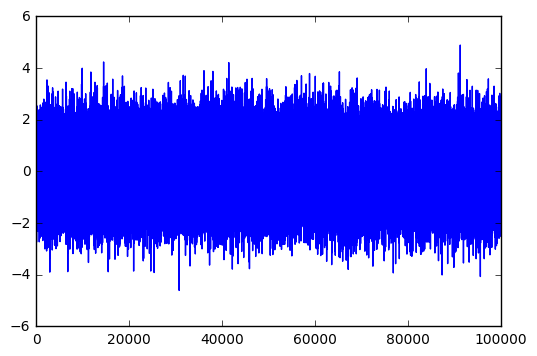

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(arr)

## what happens if the secondary file is moved?

or renamed? or was never downloaded?

everything else works, but the external link is broken, resulting in a `KeyError` when trying to access it

In [13]:
%%bash
rm secondary.hdf5

In [14]:
with h5py.File('primary.hdf5','r') as primary:
    print primary['local array']
    arr = primary['external array'][:]

<HDF5 dataset "local array": shape (4,), type "<i8">


KeyError: "Unable to open object (Unable to open external file, external link file name = 'secondary.hdf5', temp_file_name = 'secondary.hdf5')"